In [1]:
import cv2
import numpy as np

In [2]:
from google.colab.patches import cv2_imshow #only used when running in Google Colab
def GC_imshow(title, img ):
  print(title)
  cv2_imshow(img) #should be changed to c2.imshow when not in Colab

In [3]:
fileName = "h_character.png" #template

#RGB images in BGR order in OpenCV
h_character = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)

# Print error message if image is null
if h_character is None:
    print('Could not read image')
else:
    print("Image file read success...")

Image file read success...


In [4]:
from tempfile import template
fileName = "text_image.png"

#RGB images in BGR order in OpenCV
text_image = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)
template_matching_image = text_image

# Print error message if image is null
if text_image is None:
    print('Could not read image')
else:
    print("Image file read success...")

Image file read success...


In [5]:
def GCImshow(title, img):
    """
    function to make windows display work in jupyter notebook
    - shows image in a separate window,
    - waits for any key to close the window.

    """

    cv2.startWindowThread()
    GC_imshow(title, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

Original image


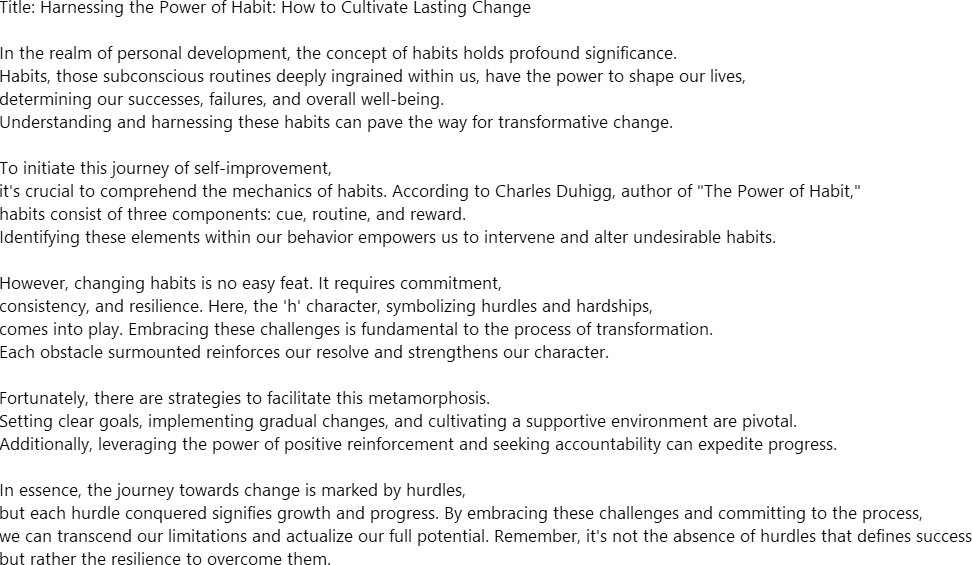

In [6]:
GCImshow('Original image', text_image)

---



<h1> My own Template matching <h1>

In [7]:
R = np.zeros(text_image.shape)
#Sliding template through the y-axis
for i in range(text_image.shape[0] - h_character.shape[0]):

    #Sliding template through the x-axis
    for j in range(text_image.shape[1] - h_character.shape[1]):

        #Sliding each template pixel and use to calculate the sum square error
        for k in range(h_character.shape[0]):
            for l in range(h_character.shape[1]):

                #Calculate the sum square error to find how it matches.
                R[i, j ] += (np.int16(h_character[k, l]) - np.int16(text_image[i+k, j+l]))**2

In [8]:
h_character.shape

(13, 8)

In [9]:
text_image.shape

(565, 972)

In [10]:
#Find index of matching
count = 0
temp = []
for i in range(text_image.shape[0]-h_character.shape[0]):
    for j in range(text_image.shape[1]-h_character.shape[1]):
        if R[i,j] == 0:
            count += 1
            temp.append([i, j])
            #print(f"index = {i}, {j}")
print("Character matches = ", count)

Character matches =  62


In [11]:
#Create boundary of 9*8 (relate to h_character)
for i in range(count):
    x, y = temp[i]
    template_matching_image[x,y:y+8] = 0
    template_matching_image[x:x+13,y] = 0
    template_matching_image[x+13,y:y+8] = 0
    template_matching_image[x:x+13,y+8] = 0

In [12]:
#Save new image with boundary
import cv2
import os

# Filename
filename = 'savedImage.jpg'

cv2.imwrite(filename, template_matching_image)

True

With boundary


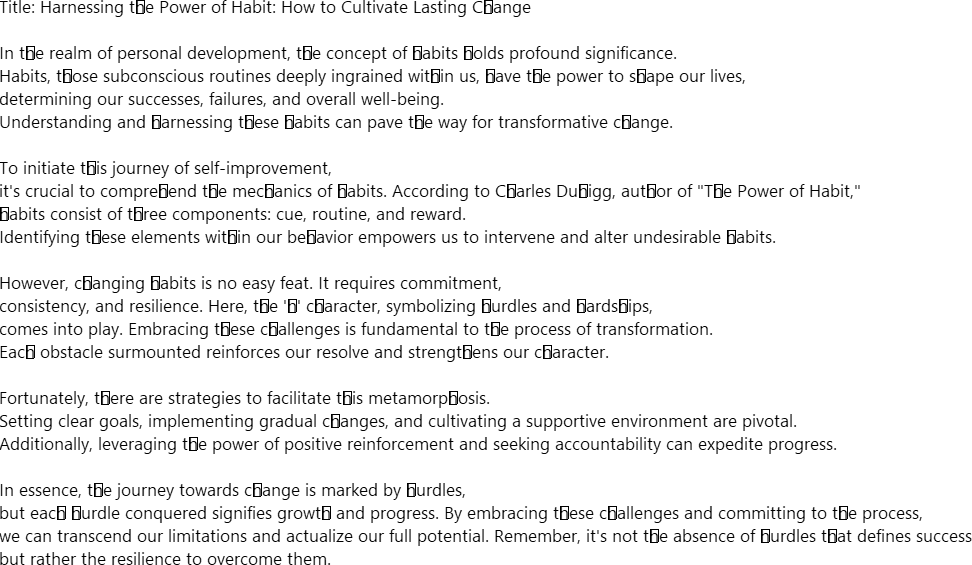

In [13]:
#The problem is size of the template and the text image can't be divisible, so in the last row, the algorithm can't detect 'h' character.
GCImshow('With boundary', template_matching_image)

************************************

<h1> OpenCV template matching <h1>

Detected


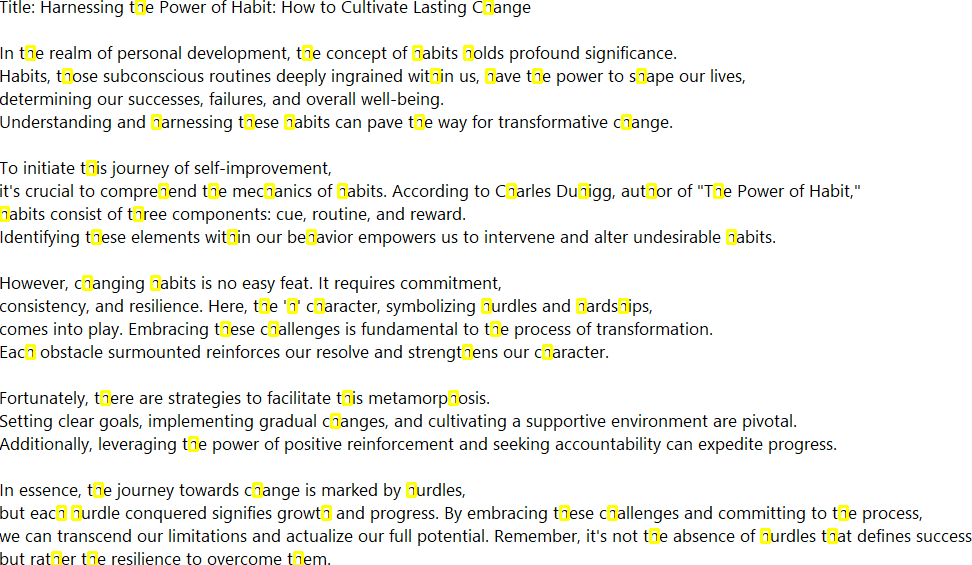

In [14]:
# Python program to illustrate
# template matching
import cv2
import numpy as np

# Read the main image
img_rgb = cv2.imread('text_image.png')

# Convert it to grayscale
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

# Read the template
template = cv2.imread('h_character.png', 0)

# Store width and height of template in w and h
w, h = template.shape[::-1]

# Perform match operations.
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

# Specify a threshold
threshold = 0.9

# Store the coordinates of matched area in a numpy array
loc = np.where(res >= threshold)

# Draw a rectangle around the matched region.
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 2)

# Show the final image with the matched area.
GCImshow('Detected', img_rgb)